In [1]:
import pandas as pd

df = pd.read_csv('location_rev.csv')
df

revenue  num_competitors  median_income  num_loyalty_members  \
0    42247.80              3.0       30527.57               1407.0   
1    38628.37              3.0       30185.49               1025.0   
2    39715.16              1.0       32182.24               1498.0   
3    35593.30              5.0       29728.65               2340.0   
4    35128.18              4.0       30691.17                847.0   
..        ...              ...            ...                  ...   
995  46689.11              3.0       28278.48                961.0   
996  34826.87              4.0       27801.73               1914.0   
997  28618.06              3.0       35481.50               1294.0   
998  40226.41              4.0       29218.30               1932.0   
999  39093.23              4.0       34785.80               2803.0   

     population_density  location_age  
0                3302.0          12.0  
1                4422.0          11.0  
2                3260.0          12.0  
3                4325.0          10.0  
4                3774.0          11.0  
..                  ...           ...  
995              3335.0          16.0  
996              2507.0          14.0  
997              1731.0          10.0  
998              4410.0          13.0  
999              4270.0           8.0  

[1000 rows x 6 columns]

In [24]:
# Quitar datos atipicos de un dataframe que superen 3 desviaciones estandar de revenue
print(len(df))
df = df[df['revenue'] < (df['revenue'].mean() + 3*df['revenue'].std())]
print(len(df))

1000
997


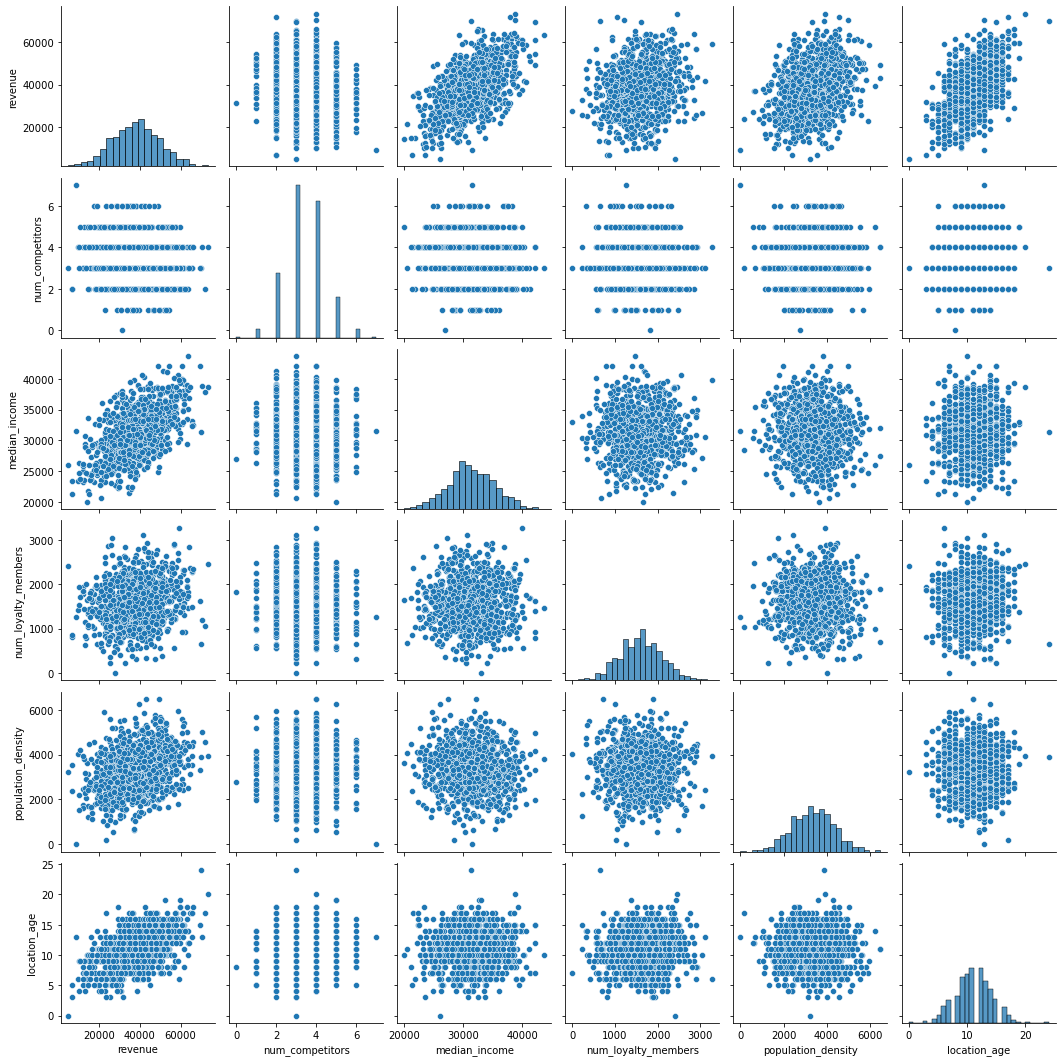

In [25]:
import seaborn as sns

sns.pairplot(df)

<AxesSubplot:>

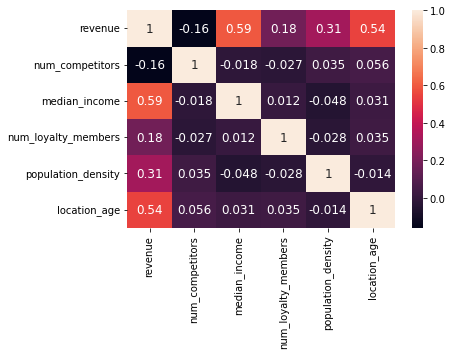

In [26]:
sns.heatmap(df.corr(), annot=True,annot_kws={"size": 12})

In [27]:
x = df [['median_income','population_density', 'location_age']]
y = df['revenue']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 100)

In [29]:
# Estandarizando los datos con StandarScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
std_x_train = scaler.transform(X_train) 
std_x_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(std_x_train,y_train)

LinearRegression()

In [31]:
X_train.columns

Index(['median_income', 'population_density', 'location_age'], dtype='object')

In [32]:
model.coef_

array([7115.55862159, 4022.82886193, 6244.56648421])

In [33]:
model.intercept_

38272.71295850067

/tmp/ipykernel_199246/3063918907.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,100000],[0,100000],'k-', color = 'r')


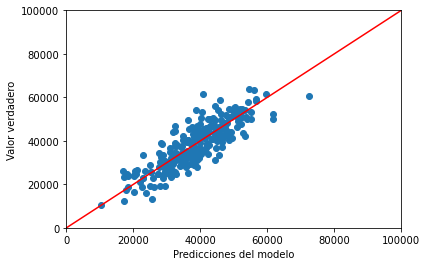

In [34]:
import matplotlib.pyplot as plt

plt.scatter(model.predict(std_x_test),y_test)
plt.xlim(0,100000)
plt.ylim(0,100000)
plt.plot([0,100000],[0,100000],'k-', color = 'r')
plt.xlabel('Predicciones del modelo')
plt.ylabel('Valor verdadero')
plt.show()

In [35]:
# una funcion para calcular el coeficiente de correlacion de pearson de x con y
import numpy as np

x = model.predict(std_x_test)
y = y_test

def pearson_coef(x,y):
    return np.corrcoef(x,y)[0,1]

def coef_corr(x,y):
    return x.dot(y)/(np.sqrt(x.dot(x))*np.sqrt(y.dot(y)))

coef = coef_corr(x,y)
print(coef)

coef_p = pearson_coef(x,y)
print(coef_p)

0.9895183448275419
0.8462565834768898


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5e2091-543c-4b2c-9a56-1e41bbaff775' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>